# Creating, modifying, converting, and plotting graphs

## Creating and sampling graphs

Graphs are created by randomly sampling undirected binomial graphs. <\br>
We use the Erdos-Renyi graph model to do so. <\br>
Default for the number of nodes $N$ is 20, and for the edge probability $p$ is 0.2. <\br>
Let's generate 25 such graphs:

In [45]:
import networkx as nx

def get_random_graphs(
        num_graphs = 25,  # number of graphs
        num_nodes = 20,  # number of nodes
        p_edge = 0.2  # edge probability
    ):
    """Function that generates a list of randomly sampled binomial graphs."""

    # create list of randomly sampled binomial graphs
    graphs = [nx.erdos_renyi_graph(num_nodes, p_edge) for _ in range(num_graphs)]

    return graphs

# get list of graphs
graphs = get_random_graphs(num_graphs=50)

# print graphs (number of edges)
_ = [print(f"G{i+1}"  # number graphs based on list's index
           f"\tN={G.number_of_nodes()}"  # check number of nodes
           f"\tE={G.number_of_edges()}"  # check number of edges
           f"\tfc={nx.is_connected(G)}")  # check if graph is connected
     for i, G in enumerate(graphs[:10])]

G1	N=20	E=33	fc=True
G2	N=20	E=41	fc=True
G3	N=20	E=37	fc=True
G4	N=20	E=35	fc=True
G5	N=20	E=37	fc=True
G6	N=20	E=32	fc=False
G7	N=20	E=48	fc=True
G8	N=20	E=36	fc=True
G9	N=20	E=35	fc=True
G10	N=20	E=46	fc=True


Observations: <\br>
$\bullet$ Doesn't always create a connected graph; <\br>
$\bullet$ Number of edges do not *drastically* vary.

Let's plot the graphs. <\br>
For that we create a beautiful graph plotting function.

In [25]:
def plot_graph_beautiful(
        G,  # graph
        ax,  # axis
        c_node="black",  # color of the nodes (single or list of length N)
        c_edge="black",  # color of the edges (single or list of length E)
        pos="spring",  # node positioning ("single", "circle", or dictionary of node-coordinate values)
        node_size=10,  # marker size of the node
        edge_size=10,  # thickness of the edge
        connectionstyle="arc3",  # style of connection (default: arc3)
    ):

    """
    Function that plots a graph.
    """

    # position of
    if pos == "spring":
        pos = nx.spring_layout(G, seed=7)
    elif pos == "circular":
        pos = nx.circular_layout(G)


    # draw nodes and edges
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_size, node_color=c_node)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color=c_edge, width=edge_size, connectionstyle=connectionstyle)

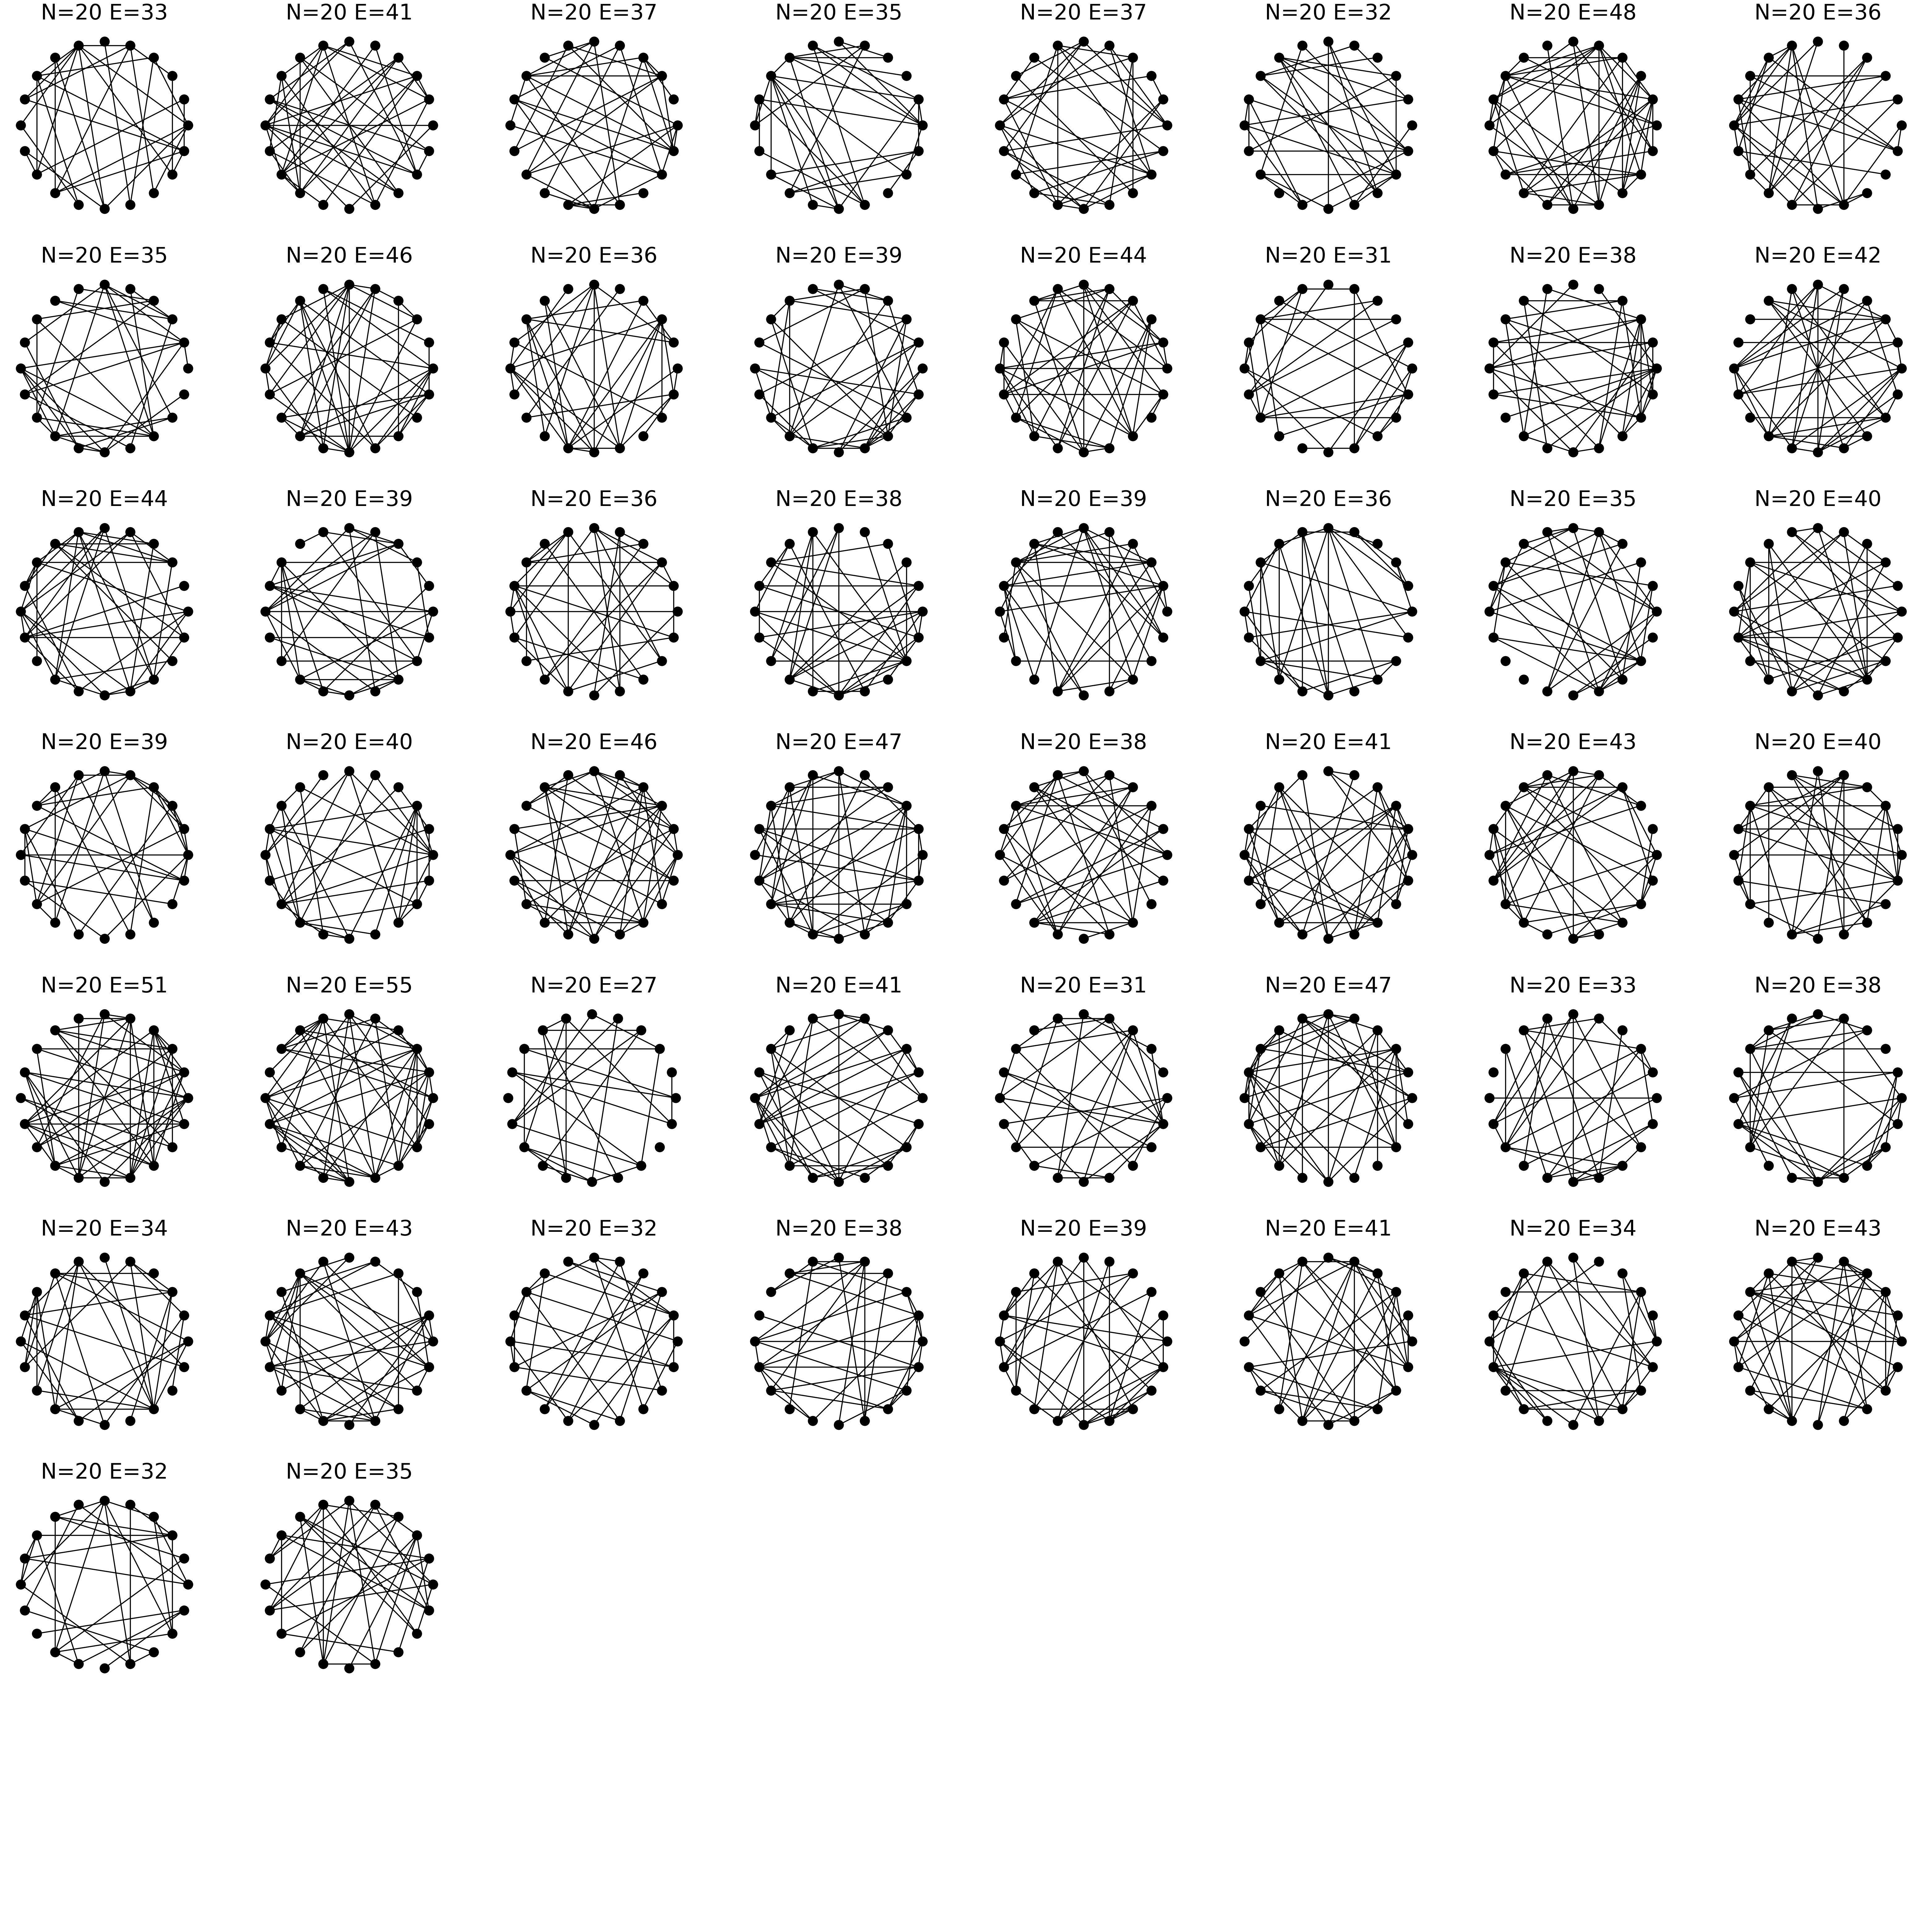

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from plot import set_figure

# plot settings
n = int(np.ceil(np.sqrt(len(graphs))))
fs = 10
fs_title = 5
background = "white"
node_size = 50*fs
edge_size = fs/4
node_color = "black"
edge_color = "black"
pos = "circular"

_, axs = set_figure(n, n, fs=fs, fc=background, fs_title=fs_title)

for i, G in enumerate(graphs):

    ax = axs[i]

    # plot graphs
    plot_graph_beautiful(G, ax, pos=pos,
                          c_node=node_color, c_edge=edge_color,
                          node_size=node_size, edge_size=edge_size)
    # set title
    ax.set_title(f"N={G.number_of_nodes()} "  # check number of nodes
                 f"E={G.number_of_edges()}")

plt.savefig(f"./dump/random_graphs_Erdos_Renyi_pos={pos}.png", dpi=300)